In [1]:
from google.colab import files

up =files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [25]:
import pandas as pd

train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

#train_df.head()
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [3]:
#print(train_df.isna().sum().sort_values())
print(test_df.isna().sum().sort_values())

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [26]:
x=train_df.iloc[:,0:-1].values

y=train_df.iloc[:,-1].values

final_test=test_df.drop(columns=['id'],axis=1).values




In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)

x_test=scaler.fit_transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

models={
    "Logreg":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "DT":DecisionTreeClassifier(),
    "RF":RandomForestClassifier()

}
accuracy_results={}
f1_score_reults={}
confusion_matrix_results={}

for model_name,model in models.items():
  model.fit(x_train,y_train)

  y_pred=model.predict(x_test)

  accuracy_results[model_name]=accuracy_score(y_test,y_pred)
  f1_score_reults[model_name]=f1_score(y_test,y_pred, average='weighted') # Added average='weighted'
  confusion_matrix_results[model_name]=confusion_matrix(y_test,y_pred)

In [30]:
print(accuracy_results)
print(f1_score_reults)


{'Logreg': 0.95, 'KNN': 0.5125, 'DT': 0.825, 'RF': 0.875}
{'Logreg': 0.9500480083267218, 'KNN': 0.5221343322382661, 'DT': 0.8249902299211941, 'RF': 0.8759083658274656}


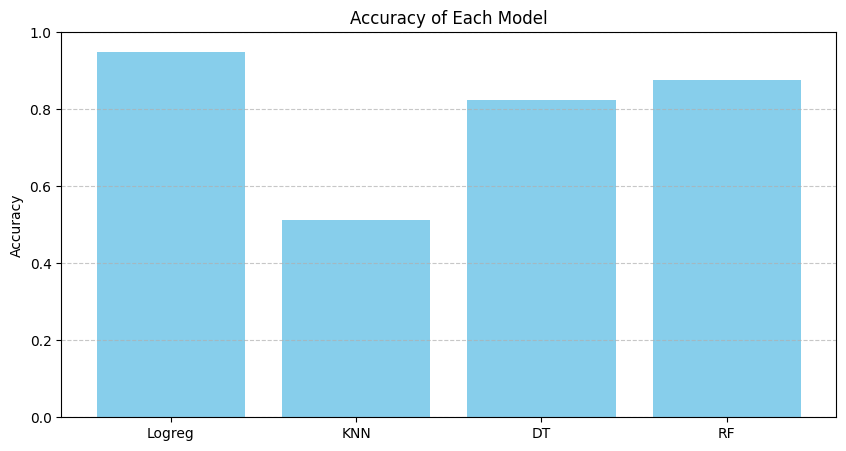

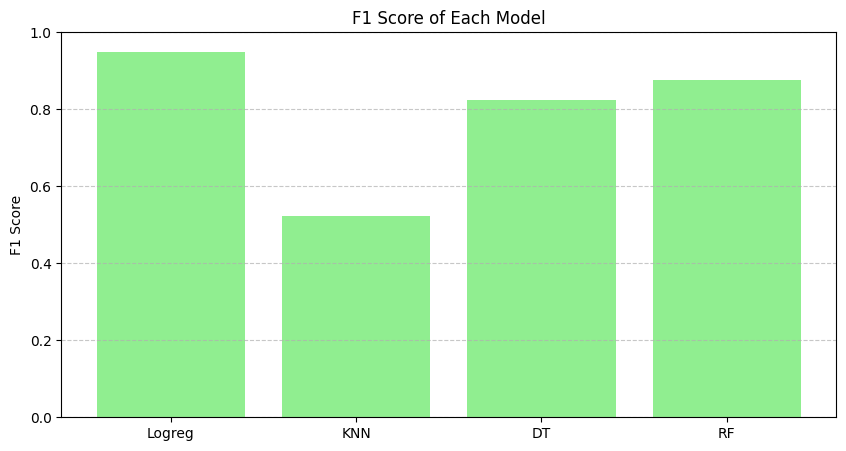

In [31]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.title('Accuracy of Each Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting F1 Score
plt.figure(figsize=(10, 5))
plt.bar(f1_score_reults.keys(), f1_score_reults.values(), color='lightgreen')
plt.title('F1 Score of Each Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


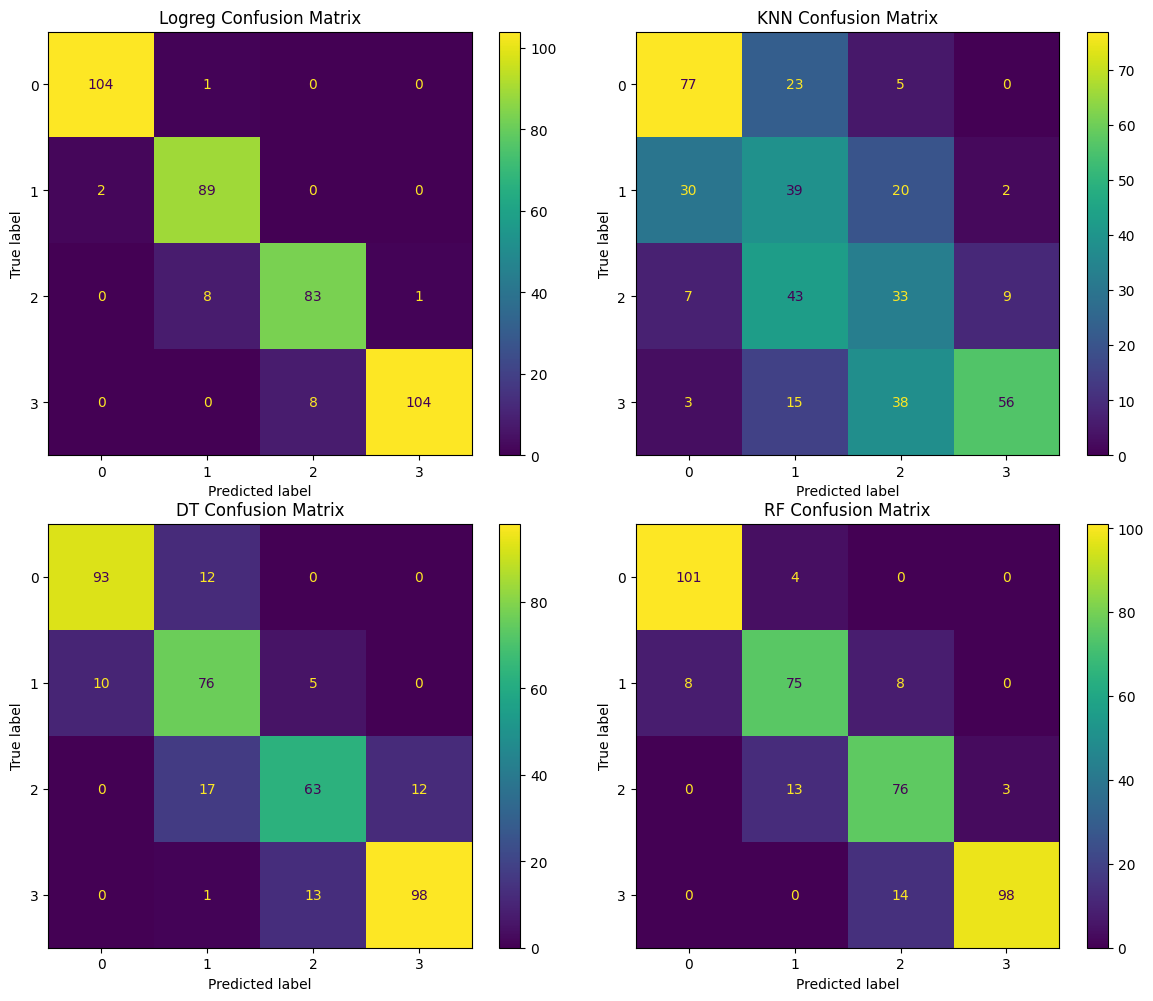

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot all confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (model_name, cm) in enumerate(confusion_matrix_results.items()):
    ConfusionMatrixDisplay(cm).plot(ax=axes[i], values_format='d')
    axes[i].set_title(f'{model_name} Confusion Matrix')

plt.tight_layout()
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logistic_params = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1],
        'solver': ['liblinear'],
        'max_iter': [200],
        'class_weight': [None, 'balanced'],
    },
    {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.01, 0.1, 1],
        'solver': ['saga'],
        'l1_ratio': [0.0, 0.5, 1.0],
        'max_iter': [200],
        'class_weight': [None, 'balanced'],
    },
    {
        'penalty': ['l2', 'none'],
        'C': [0.01, 0.1, 1],
        'solver': ['lbfgs', 'newton-cg'],
        'max_iter': [200],
        'class_weight': [None, 'balanced'],
    }
]



logreg=LogisticRegression()

final_model=GridSearchCV(logreg,logistic_params,cv=5)

In [34]:
final_model.fit(x_train,y_train)

y_pred=final_model.predict(x_test)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_

In [35]:
accuracy_score(y_test,y_pred)

0.965

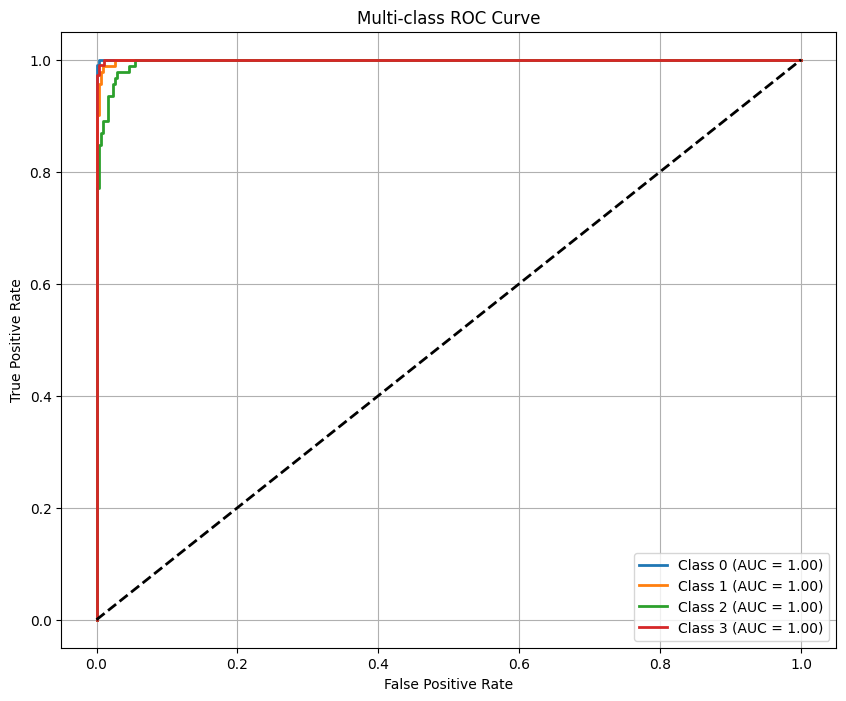

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output (needed for multiclass ROC)
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_score = final_model.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

# Plot chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.92      0.99      0.95        91
           2       0.94      0.92      0.93        92
           3       1.00      0.96      0.98       112

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.97       400



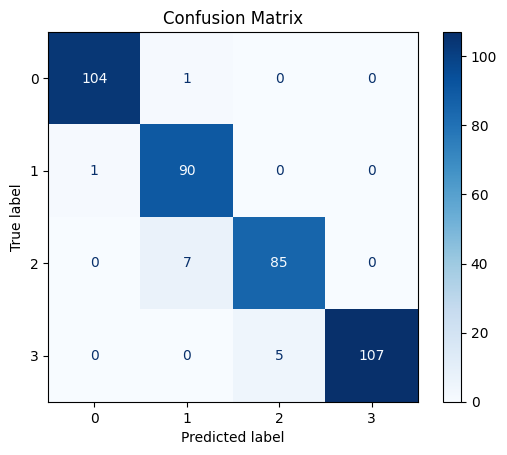

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = final_model.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [38]:
import pandas as pd

# Step 1: Scale the final test set using the same scaler
final_test_scaled = scaler.fit_transform(final_test)

# Step 2: Predict using the final trained model
final_predictions = final_model.predict(final_test_scaled)

# Step 3: Create a new DataFrame from the test set (or use test_df if columns are named)
result_df = test_df.copy()
result_df['Predicted_price_range'] = final_predictions

# Step 4: Export to Excel
result_df.to_excel('final_predictions.xlsx', index=False)

print("✅ Final predictions saved to 'final_predictions.xlsx'")


✅ Final predictions saved to 'final_predictions.xlsx'


In [39]:
files.download('final_predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# and know saving the model

import joblib

joblib.dump(final_model,'final_model.pkl')



['final_model.pkl']

In [43]:
files.download('final_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>